In [1]:
import torch
from nd_scaffold import GridModule

mod = GridModule(shape=(3,3,5), device='cuda:0', T=0.1)

print(mod.state)
print(mod.onehot())

mod.denoise_self()

print(mod.state)
print(mod.onehot())

mod.shift(torch.tensor([1,0,0], device='cuda:0'))

print(mod.state)
print(mod.onehot())

mod.denoise_self()

print(mod.state)
print(mod.onehot())



tensor([[[1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]], device='cuda:0')
tensor([9.9801e-01, 4.5309e-05, 4.5309e-05, 4.5309e-05, 4.5309e-05, 4.5309e-05,
        4.5309e-05, 4.5309e-05, 4.5309e-05, 4.5309e-05, 4.5309e-05, 4.5309e-05,
        4.5309e-05, 4.5309e-05, 4.5309e-05, 4.5309e-05, 4.5309e-05, 4.5309e-05,
        4.5309e-05, 4.5309e-05, 4.5309e-05, 4.5309e-05, 4.5309e-05, 4.5309e-05,
        4.5309e-05, 4.5309e-05, 4.5309e-05, 4.5309e-05, 4.5309e-05, 4.5309e-05,
        4.5309e-05, 4.5309e-05, 4.5309e-05, 4.5309e-05, 4.5309e-05, 4.5309e-05,
        4.5309e-05, 4.5309e-05, 4.5309e-05, 4.5309e-05, 4.5309e-05, 4.5309e-05,
        4.5309e-05, 4.5309e-05, 4.5309e-05], device='cuda:0')
tensor([[[1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 

In [8]:
import numpy as np
import torch
from nd_scaffold import GridScaffold, SparseMatrixBySparsityInitializer
from graph_utils import graph_scaffold, print_imgs_side_by_side
import os


def test_mnist(num_imgs=1, prefix="", relu_theta=0.5, sparsity=0.1, N_h=400, T=0.01):
    import torchvision
    from torchvision import transforms

    transform = transforms.Compose(
        [transforms.ToTensor(), transforms.Lambda(lambda x: x.flatten())]
    )

    mnist = torchvision.datasets.MNIST(
        root="data", train=True, download=True, transform=transform
    )

    mnist_data = mnist.data.flatten(1).float().to("cuda")[:num_imgs]
    mnist_data = (mnist_data - mnist_data.mean()) / mnist_data.std()
    l = mnist_data.shape[0]

    shapes = [(3, 3, 5), (4, 4, 7)]
    velocities = torch.tile(torch.tensor([[1,1,1]]), (l, 1)).to("cuda")

    if False and os.path.exists("checkpoint.pt"):
        GS = GridScaffold.load("checkpoint.pt", device="cuda")
    else:
        GS = GridScaffold(
            shapes=shapes,
            N_h=N_h,
            input_size=784,
            device="cuda",
            sparse_matrix_initializer=SparseMatrixBySparsityInitializer(
                sparsity=sparsity,
                device="cuda",
            ),
            relu_theta=relu_theta,
            T=T
        )
        # GS.checkpoint("checkpoint.pt")

    # graph_scaffold(GS)

    # random_noise = torch.zeros_like(mnist_data).uniform_(-128, 128)
    noisy_mnist = mnist_data  # + random_noise
    # recalled_imgs = GS.recall(noisy_mnist)

    # for i in range(1):
    #     original_img = mnist_data[i].reshape(28, 28).cpu().numpy()
    #     noisy_img = noisy_mnist[i].reshape(28, 28).cpu().numpy()
    #     recalled_img = recalled_imgs[i].reshape(28, 28).cpu().numpy()
    #     print_imgs_side_by_side(
    #         original_img,
    #         noisy_img,
    #         recalled_img,
    #         out=f"mnist_unlearned_{i}.png",
    #         captions=["original", "noisy", "recalled"],
    #         title="Unlearned",
    #     )

    GS.learn_path(observations=mnist_data, velocities=velocities)
    recalled_imgs = GS.recall(noisy_mnist)

    for i in range(1):
        original_img = mnist_data[i].reshape(28, 28).cpu().numpy()
        noisy_img = noisy_mnist[i].reshape(28, 28).cpu().numpy()
        recalled_img = recalled_imgs[i].reshape(28, 28).cpu().numpy()
        print_imgs_side_by_side(
            original_img,
            noisy_img,
            recalled_img,
            out=f"{prefix}mnist_learned_{i}.png",
            captions=["original", "noisy", "recalled"],
            title="Learned",
        )

    similarity = torch.nn.functional.cosine_similarity(mnist_data, GS.recall(noisy_mnist))
    return similarity

test_mnist(10, sparsity=0.9, N_h=800, prefix="", relu_theta=0.9)

module shapes:  [(3, 3, 5), (4, 4, 7)]
N_g     :  157
N_patts :  5040
N_h     :  800
storing memory in: tensor([1.0000e+00, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44,
        3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44,
        3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44,
        3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44,
        3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44,
        3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44,
        3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44,
        3.7835e-44, 3.7835e-44, 3.7835e-44, 1.0000e+00, 3.7835e-44, 3.7835e-44,
        3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44,
        3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44,
        3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44,
        3.7835e-

tensor([0.7988, 0.7900, 0.6303, 0.5175, 0.7638, 0.7050, 0.6295, 0.6328, 0.6008,
        0.7587], device='cuda:0')

module shapes:  [(3, 3, 5), (4, 4, 7)]
N_g     :  157
N_patts :  5040
N_h     :  400
storing memory in: tensor([1.0000e+00, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44,
        3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44,
        3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44,
        3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44,
        3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44,
        3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44,
        3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44,
        3.7835e-44, 3.7835e-44, 3.7835e-44, 1.0000e+00, 3.7835e-44, 3.7835e-44,
        3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44,
        3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44,
        3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44,
        3.7835e-

Text(0, 0.5, 'similarity')

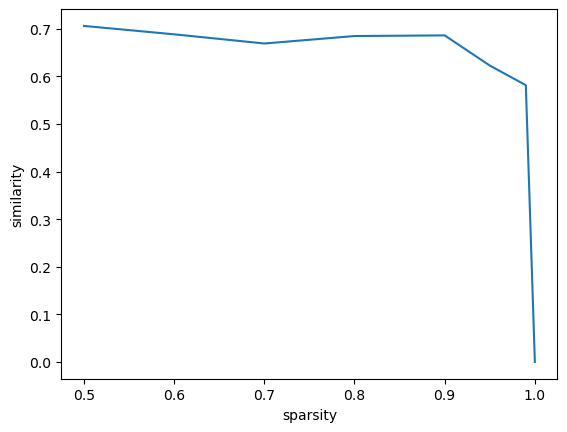

In [9]:

sparsitys = [0.5,0.6,0.7,0.8,0.9,0.95,0.99,1]
similarities = np.zeros(len(sparsitys))
N = 10
for i, sparsity in enumerate(sparsitys):
    simliarity = test_mnist(N, prefix=f"sparsity_{sparsity}_", sparsity=sparsity).sum().item() / N 
    similarities[i] = simliarity

# plot sim against relu_theta
import matplotlib.pyplot as plt

print(sparsitys, similarities)
plt.plot(sparsitys, similarities)
plt.xlabel("sparsity")
plt.ylabel("similarity")

In [ ]:

print(sparsitys, similarities)